<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 1: Pregunta 3 </H3>
<hr style="height:2px;border:none"/>

**Integrantes**  
* Eliana Providel - 692018101-3
* Rodrigo Hermosilla - 9574144-4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
c_indexes = np.arange(0,188)
columns=[]
for c in c_indexes:
    columns.append('c'+str(c))

In [3]:
normal = pd.read_csv('ptbdb_normal.csv', prefix='c', header=None)
normal['target']=0
anormal = pd.read_csv('ptbdb_abnormal.csv', prefix='c', header=None)
anormal['target']=1

In [4]:
#verificando la cantidad de datos
print("Normal : ", normal.shape)
print("Anormal: ",anormal.shape)

Normal :  (4046, 189)
Anormal:  (10506, 189)


### 3.a Carga de datos

> Cargue los datos, cree la columna `target` y junte ambos DataFrame en uno solo con método `append`. Por que es necesario pasar una lista de id al cargar los datos?

>Explore rápidamente los datos: estan muy desbalanceadas las clases? Que tan dispares son las magnitudes de las mediciones? Pareciera necesario estandarizar los datos antes de utilizarlos? 

>Separe los datos utilizando `train_test_split`. Qué habria ocurrido por la forma en que se cargaron los datos si utilizamos la opción `shuffle = False`? 

Dado que los datos vienen sin cabecera es necesario cargar los datos con un conjunto de columnas genericas e indicar la inexistencia de la cabecera, si esto no se realiza, entonces cargará la primera fila como cabecera, lo que ocasionará que al concatenar los dos sets, los datos queden en distintas columnas.

In [5]:
data=normal.append(anormal, sort=False)

In [6]:
print(data.shape) #se verifica que la concatenación ha resultado.

(14552, 189)


In [7]:
(data.isna().sum()>0).sum() #No existen valores nulos

0

En la siguiente gráfica es posible apreciar que efectivamente las clases están desbalanceadas, siendo los datos de la clase Anormal un 72,2% y los de la clase normal un 27,8% del total de los datos. Sin embargo las mediciones no son dispares (como se comprobará más adelante todas las mediciones están en [0,1]).

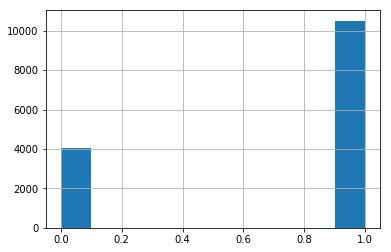

In [8]:
_=data['target'].hist()

A continuación se muestra la distribución de los 188 atributos, con el objetivo de conocer la distribución de los datos.

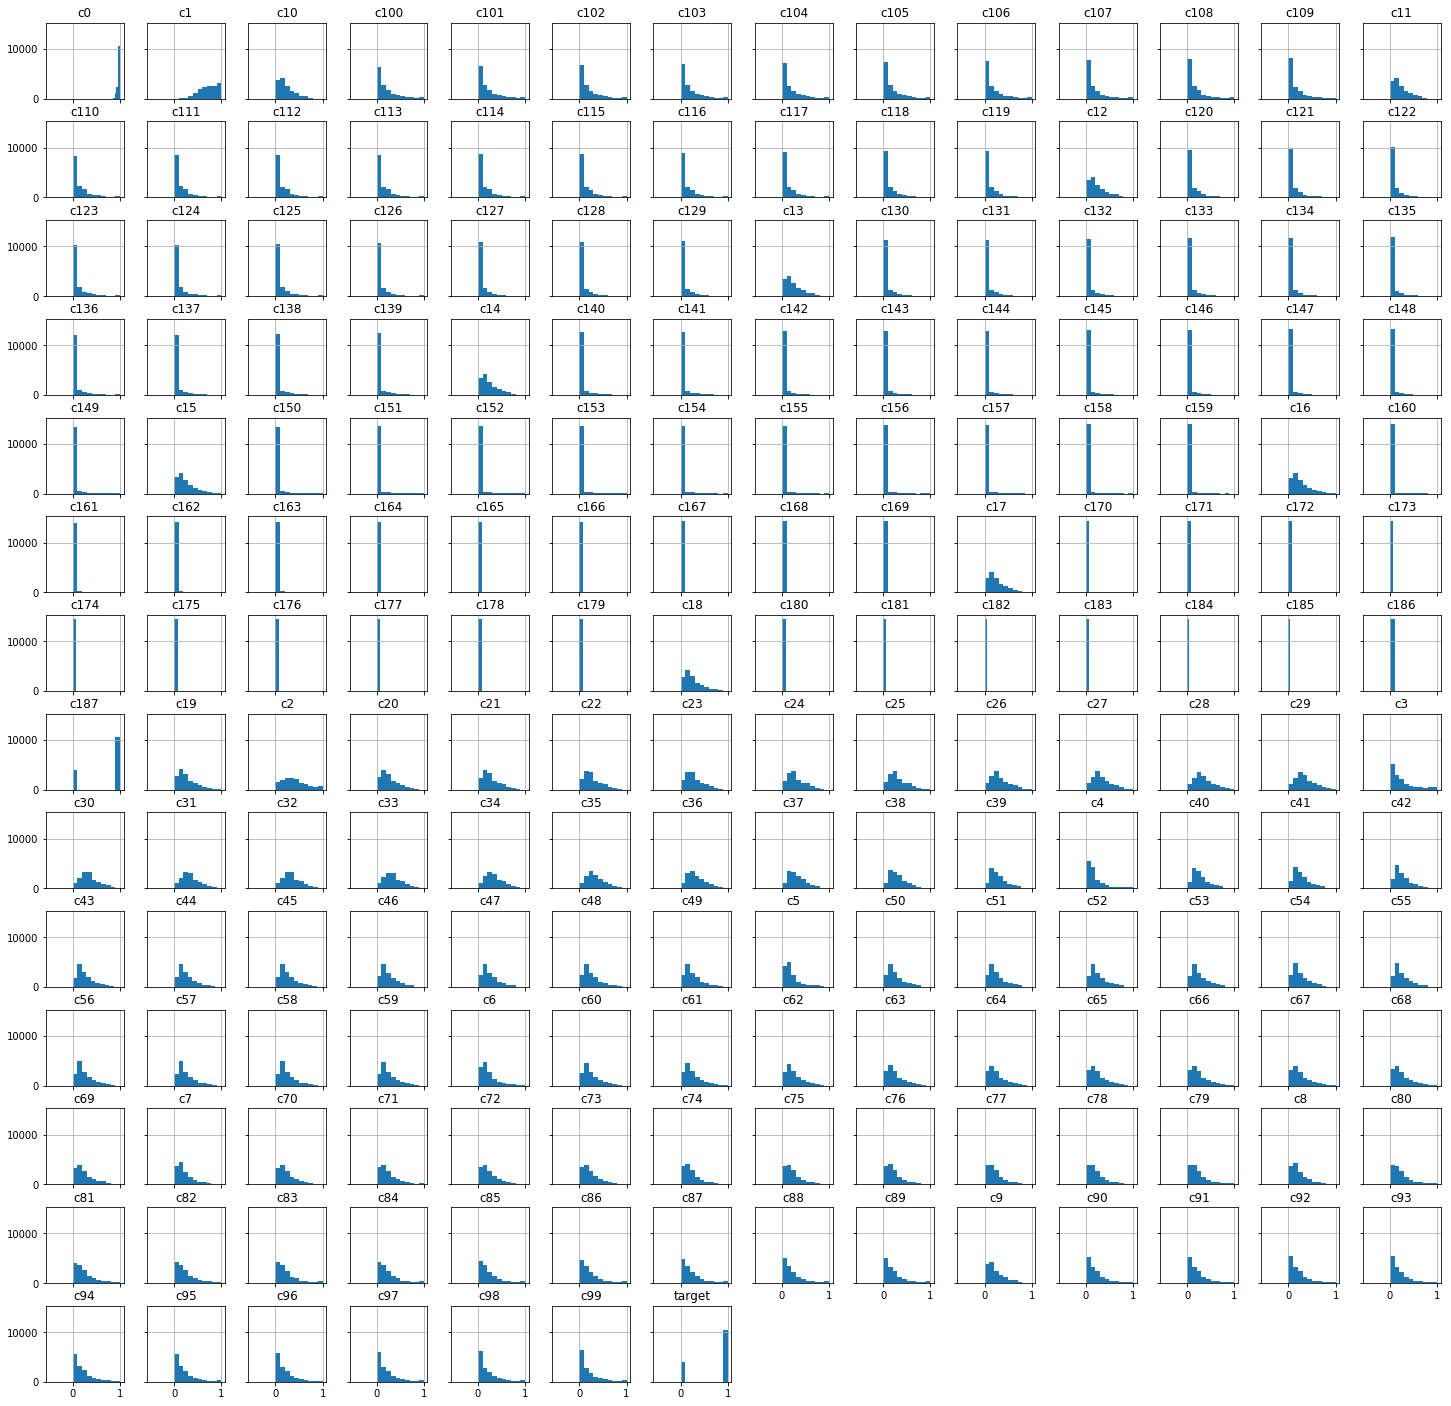

In [9]:
_=data.hist(figsize=(25,25), sharey=True, sharex=True)

Como se observa en las gráficas, las distribuciones son muy similares en casí todos los casos, y se ve como axisten agrupaciones o patrones entre los gráficos.

En la siguiente línea es posible corroborar que los datos están entre 0 y 1, por lo cual no es requerido estandarizar.

In [10]:
print('Máximo: {}, mínimo: {}, media: {}'.format(np.max(data).max(), np.min(data).min(),np.mean(data).mean()))

Máximo: 1.0, mínimo: 0.0, media: 0.1796889575918907


In [11]:
ydata=data['target']
Xdata=data.drop(columns='target')

Se utilizarán las siguientes proporciones para separar la data:

|Subconjunto|Cantidad   |%|
|---|---|---|
|Total Original  |14.552   |100%|
|Entrenamiento   |10.914   |75%|
|Testing   |1.456   |10%|
|Validación   |2.182   |15%|

In [12]:
Xtrain, Xtemp, ytrain, ytemp=train_test_split(Xdata, ydata, test_size=0.25, shuffle=True)
Xval, Xtest, yval, ytest=train_test_split(Xtemp, ytemp, test_size=0.40, shuffle=True)

In [13]:
## Conociendo como quedaron los conjuntos de datos
print("Xtrain: ", Xtrain.shape)
print("Xval  : ", Xval.shape)
print("Xtest : ", Xtest.shape)
print("ytrain: ", ytrain.shape)
print("yval  : ", yval.shape)
print("ytest : ", ytest.shape)

Xtrain:  (10914, 188)
Xval  :  (2182, 188)
Xtest :  (1456, 188)
ytrain:  (10914,)
yval  :  (2182,)
ytest :  (1456,)


La razón de configurar *suffle=True* es que dado que se concatenaron las muestras normales con las anormales, es necesario mezclarlas, para poder tener muestras de *training, validation y testing* heterogeneas.

### 3.b Correlación

> Calcule la matriz de correlación, note que esto esta implementado en pandas. Representela de alguna forma que le parezca adecuada, por ejemplo como un heatmap. Qué observa, comente. Elimine las columnas que muestra el código. 

In [14]:
#Se eliminan las columnas
Xtrain = Xtrain.drop(columns=['c184','c185','c186','c187'])
Xtest = Xtest.drop(columns=['c184','c185','c186','c187'])
Xval = Xval.drop(columns=['c184','c185','c186','c187'])

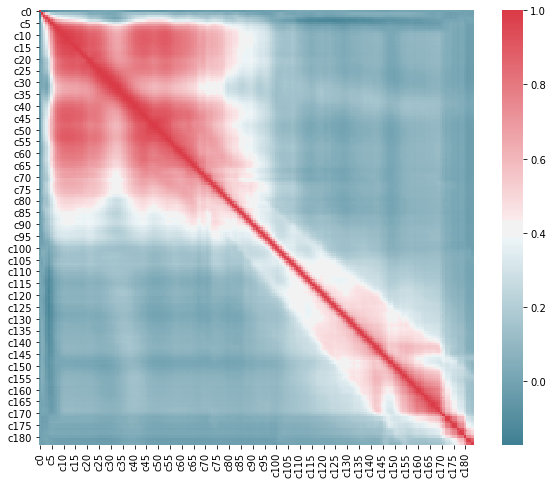

In [15]:
#heatmap
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = Xtrain.corr()
_=sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

En la gráfica anterior es posible apreciar una fuerte correlación entre la primera mitad de los elementos de la matriz.

### 3.c Regresión Logística

> Realice una primera regresión logística con los datos. Que valor entrega el metodo `score`?

> Calcule la matriz de confusión y comente respecto al valor dado por el `score`. Comente sobre la distinta información entregrada por la matriz de confusión y su interpretación. 

In [16]:
reg = LogisticRegression()
reg.fit(Xtrain, ytrain)

/home/srodriguez/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
print("Score val: ",reg.score(Xval, yval))

Score val:  0.8212648945921174


In [18]:
print("Score test: ", reg.score(Xtest, ytest))

Score test:  0.8495879120879121


In [19]:
ypred=reg.predict(Xtest)

In [20]:
cm = confusion_matrix(ytest, ypred)
cm

array([[ 213,  124],
       [  95, 1024]])

In [21]:
def plot_confusion(cm, normalize=False):
    fig, ax = plt.subplots(figsize=(7, 7))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[0]),
           yticks=np.arange(cm.shape[1]),
           title='Matriz de Confusión',
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


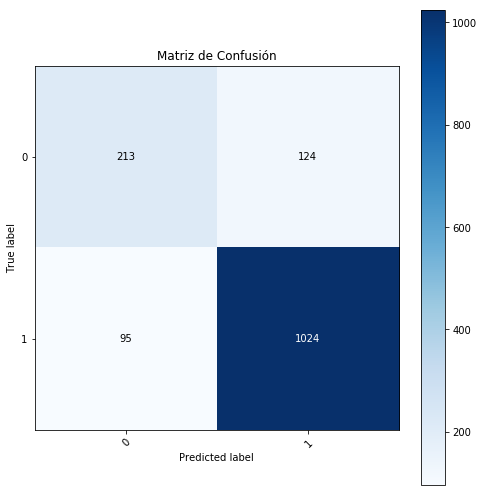

In [22]:
_=plot_confusion(cm)

Obtenemos los datos de acuerdo al conjunto de test

In [23]:
ceros = list(ytest).count(0)
unos  = list(ytest).count(1)
print("ceros", ceros)
print("unos ", unos)

ceros 337
unos  1119


Al calcular el valor de *accuracy* de la matriz de confusión es posible comprender que se trata del valor del score de la regresión, es decir **(a+d)/(a+b+c+d)**, donde:<br/>
<ul>
    <li><b>a = verdaderos negativos (1° cuadrante)</b></li>
    <li>b = falsos positivos (2° cuadrante)</li>
    <li>c = falsos negativos (3° cuadrante)</li>
    <li><b>d = verdaderos positivos (4° cuadrante)</b></li>
</ul>

In [24]:
a=cm[0][0]
b=cm[0][1]
c=cm[1][0]
d=cm[1][1]

De acuerdo a los valores y la matriz de confusión,  los porcentajes de correctamente clasficados son:

In [25]:
print("Negativos (0) correctamente classificados: ", (a*100)/ceros,"%")
print("Positivos (1) correctamente classificados: ", (d*100)/unos,"%")

Negativos (0) correctamente classificados:  63.204747774480715 %
Positivos (1) correctamente classificados:  91.51027703306524 %


In [26]:
accuracy = (a+d)/(a+b+c+d)
print("Accuracy: ",accuracy)

Accuracy:  0.8495879120879121


In [27]:
print("Score test: " ,reg.score(Xtest, ytest))

Score test:  0.8495879120879121


Por otra parte presentamos otras métricas, con el objetivo de complementar lo anterior:

In [28]:
sensitivity = d / (c+d) #en los casos binarios es equivalente al recall
recall = sensitivity #de los casos verdaderos positivos cuantos son clasificados como tal
print("sensitivity ", sensitivity)

sensitivity  0.9151027703306523


In [29]:
specifity = a / (a+b) #de los verdaderos negativos cuantos son clasificados como tal
print("specifity", specifity)

specifity 0.6320474777448071


In [30]:
precision = d / (b+d) #de todos los predichos como positivos, son los verdaderos positivos
print("precision: ",precision) 

precision:  0.89198606271777


In [31]:
f1 = 2*(precision*recall)/(recall+sensitivity) #la calidad del modelo
print("F1: ", f1)

F1:  0.89198606271777


Una forma apropiada de conocer los valores subyacentes a la a calidad de la clasificación es a través del método `classification_report`.

In [32]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       337
           1       0.89      0.92      0.90      1119

   micro avg       0.85      0.85      0.85      1456
   macro avg       0.79      0.77      0.78      1456
weighted avg       0.85      0.85      0.85      1456



Es importante destacar que la regresión logistica entrego una precisión adecuada sobre la clasificación 1, al contrario respecto a la clasificación 0. Esto puede deberse al desbalanceo de clases.

### 3.d Otra métrica

> Otra forma de comparar modelos podría ser con la siguiente métrica. Esta mide la cantidad de aciertos pero toma en cuenta algo más. Que interpretación podría darle a la métrica en el código? 

>Si un modelo entrega 0.5 y otro 0.4 en esta métrica, cual es mejor? 

In [33]:
np.mean((np.max(reg.predict_proba(Xtest),axis=1)*(reg.predict(Xtest)-ytest))**2)

0.06987394169701532

La formula anterior, se asemeja mucho al error funcional. Sin embargo al verla en detalle se entiene que indica con que probablidad ocurre el error, dando un cierto peso a este.

Con 0.4 es mucho mejor, dado que lo que se busca en minimizar el error, para la aproximación al error funcional (que no lo conocemos). Minimizar el error es la base del aprendizaje de máquina, dado que sólo se tiene un subconjunto de todos los datos, y no se conoce la distribución subyacente de todos los datos (dado que sólo se tiene una muestra de ellos).

In [34]:
np.max(reg.predict_proba(Xtest), axis=1)

array([0.65263135, 0.73258357, 0.95399763, ..., 0.53608857, 0.88297375,
       0.98314847])

### 3.e PCA y LDA

>Transforme los datos mediante PCA a 2 dimensiones y grafique un subsampleo de alrededor de 50 - 100 datos con 50% de cada clase. Coloree cada punto correspondiente a la clase a la que pertenece. 

>Realice el mismo analisis para LDA, considerando el mismo conjunto de puntos. Cual de ambos métodos le parece más apropiado?

>Grafíque el centro de gravedad (promedio en cada cordenada) de cada una de las clases luego de la reducción de dimensionalidad.

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_class1_pca = pca.fit_transform(Xtrain, ytrain)
finalDf = pd.DataFrame(data=X_class1_pca, columns=['principal component 1','principal component 2'])
finalDf['target'] = np.array(ytrain)
finalDf['target'] = finalDf['target'].replace(0,'Normal')
finalDf['target'] = finalDf['target'].replace(1,'Anormal')
finalDf.head()

,principal component 1,principal component 2,target
0,-1.748454,0.163578,Anormal
1,-1.382219,0.258634,Anormal
2,-0.209325,0.605608,Anormal
3,2.245050,-0.175071,Anormal
4,-1.406402,0.268680,Anormal


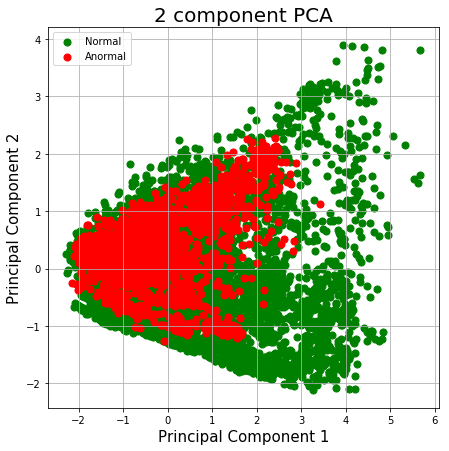

In [36]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Normal', 'Anormal']
colors = ['Green', 'Red']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] != target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [37]:
pca.explained_variance_ratio_ #centros de gravedad

array([0.39132639, 0.12789762])

[[   2   31]
 [ 335 1088]]


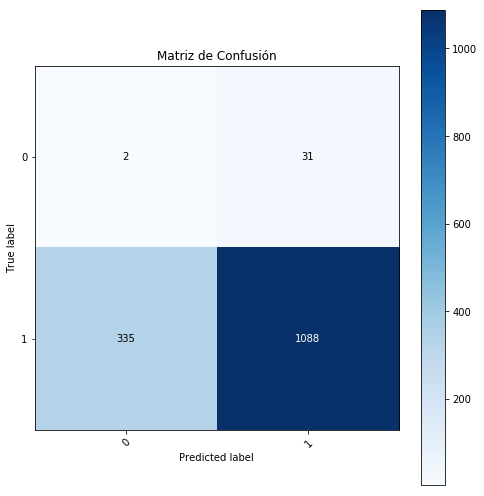

In [38]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
xtest_pca = pca.transform(Xtest)
logisticRegr.fit(X_class1_pca , ytrain)
cm = confusion_matrix(logisticRegr.predict(xtest_pca),ytest)
print(cm)
_=plot_confusion(cm)

In [39]:
a=cm[0][0]
b=cm[0][1]
c=cm[1][0]
d=cm[1][1]
print("Negativos (0) correctamente classificados: ", (a*100)/ceros,"%")
print("Positivos (1) correctamente classificados: ", (d*100)/unos,"%")

Negativos (0) correctamente classificados:  0.5934718100890207 %
Positivos (1) correctamente classificados:  97.22966934763181 %


De acuerdo a la matriz de confusión con PCA, al predecir los negativos (0), se comporta notoriamente peor que con todas las características. Sin embargo, los positivos (1), matienen su comportamiento con PCA.

Lo siguientes es con LDA. Que tiene como resultado una dimensión de salida.

In [40]:
from sklearn import discriminant_analysis 
lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)
X_class1_lda = lda.fit_transform(Xtrain, ytrain)
finalDf = pd.DataFrame(data=X_class1_lda, columns=['principal component 1'])
finalDf['target'] = np.array(ytrain)
finalDf['target'] = finalDf['target'].replace(0,'Normal')
finalDf['target'] = finalDf['target'].replace(1,'Anormal')
finalDf.head()

,principal component 1,target
0,-0.361373,Anormal
1,-1.055579,Anormal
2,0.861764,Anormal
3,0.631190,Anormal
4,-0.616806,Anormal


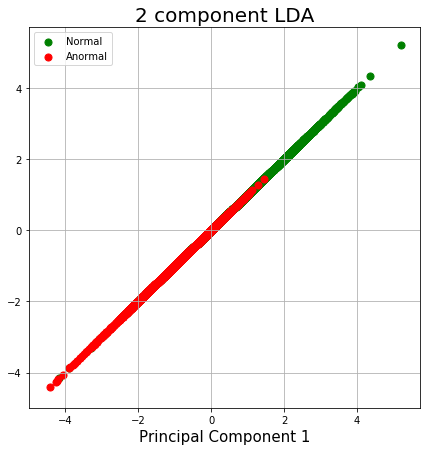

In [41]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)

targets = ['Normal', 'Anormal']
colors = ['Green', 'Red']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] != target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 1']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

[[ 188  105]
 [ 149 1014]]


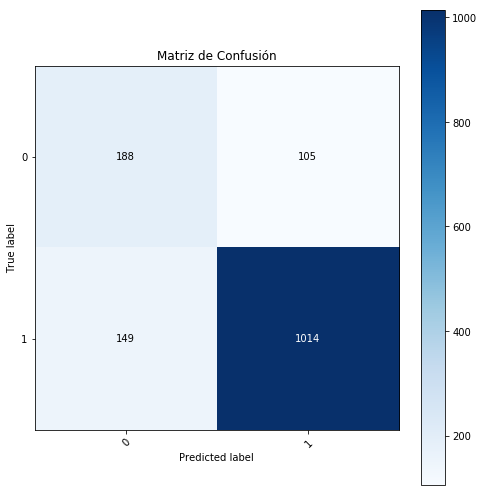

In [42]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
xtest_lda = lda.transform(Xtest)
logisticRegr.fit(X_class1_lda, ytrain)
cm = confusion_matrix(logisticRegr.predict(xtest_lda),ytest)
print(cm)
_=plot_confusion(cm)

In [43]:
a=cm[0][0]
b=cm[0][1]
c=cm[1][0]
d=cm[1][1]
print("Negativos (0) correctamente classificados: ", (a*100)/ceros,"%")
print("Positivos (1) correctamente classificados: ", (d*100)/unos,"%")

Negativos (0) correctamente classificados:  55.78635014836795 %
Positivos (1) correctamente classificados:  90.61662198391421 %


Con LDA, el resultado mejora, sin embargo sigue demostrandose que la clasificación para los positivos sigue siendo mejor, y en nuestra opinión directamente relacionado con la cantidad de datos que se tienen para el aprendizaje.

#### 3.f Más reducción de dimensionalidad
> Entrene un modelo de regresión logística para el método que le pareció más apropiado de la pregunta anterior, haciendo variar el número de componentes de 2 a 120. Calcule para cada modelo alguna métrica de la calidad del modelo tanto sobre el conjunto de entrenamiento como sobre el conjunto de validación. 

>Grafíque como varían ambos errores en función de la dimensionalidad sobre la que se trabaja. 

>Si le sobra *tiempo* y _c r e a t i v i d a d_  proponga cambios o extienda la exploración buscando mejorar el desempeño o comprender mejor el problema (solo para puntaje extra).

>[//]: <> (  https://meme.xyz/uploads/posts/t/l-27712-i-procrastinate-to-the-last-minute-den-i-freaked-it.jpg )

In [44]:
Xtrain.shape

(10914, 184)

In [45]:
from sklearn.decomposition import PCA
results_test = []
results_train = []
for i in range(2,120):    
    pca = PCA(n_components=i)
    X_class1_pca = pca.fit_transform(Xtrain, ytrain) 
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    logisticRegr.fit(X_class1_pca, ytrain)    
    
    ypred_train = logisticRegr.predict(X_class1_pca)
    accuracy_train = (ypred_train == ytrain).mean()
    results_train.append(accuracy_train)
    
    xtest_pca = pca.transform(Xtest)    
    ypred_test = logisticRegr.predict(xtest_pca)    
    accuracy_test = (ypred_test == ytest).mean()    
    results_test.append(accuracy_test)
    #print("Dimension %d - Accuracy %f" % (i, accuracy))    

/home/srodriguez/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/srodriguez/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/srodriguez/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/srodriguez/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/srodriguez/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/l

Text(0.5, 1.0, 'Accuracy vs Dimensión')

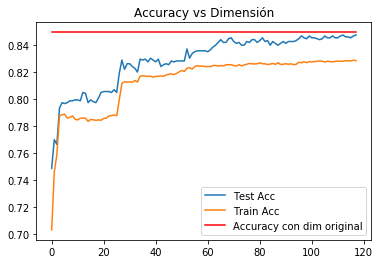

In [46]:
plt.plot(results_test, label = "Test Acc")
plt.plot(results_train, label = "Train Acc")
plt.plot([accuracy]*len(results_test), label = "Accuracy con dim original", color = 'red')
plt.legend()
plt.title("Accuracy vs Dimensión")

En el gráfico se presenta accuracy del conjuto del entrenamiento y test, y también se compará con accuracy de modelo obtenido en la pregunta 3c, donde se realiza la regresión logística con todos los atributos.
La línea roja representa el accuracy con 184 atributos, se presenta de esa forma para comparar con todas las variaciones de dimensionalidad, ya que para el modelo de la 3c corresponde sólo a 1 punto.

Como se observa al modificar la dimensionalidad, con PCA >=60, los resultados son muy similares en test  con respecto al modelo con todos los atributos (sin modificar dimensioanlidad).

#### 3.g Naive Bayes
> "Entrene" un modelo utilizando Naive Bayes y comparelo con el modelo logístico que entrenó anteriormente. Le parece adecuado el nombre _Naive_?

In [47]:
from sklearn import naive_bayes as sknb
NB = sknb.BernoulliNB()
NB.fit(Xtrain, ytrain)
score_nb = NB.score(Xtest, ytest)
score_lr = reg.score(Xtest, ytest)

print("Score Naive Bayes: ", score_nb)
print("Score Logistic Regression: ", score_lr)


Score Naive Bayes:  0.6167582417582418
Score Logistic Regression:  0.8495879120879121


El modelo Naive Bayes tiene menor score que la regresión logística, porque es probable que no se esté cumpliendo el supuesto 'inocente' de independencia entre los distintos features.